# Week 12 - 15/1/18

**OBJECTIVES**

- Send Tim the analytical form for epsilon derivation
- Start thinking about analysis for certain locations at particular distances

In [1]:
%load_ext autoreload
%autoreload 2

## Single Location Analysis

We want to start by picking a single location and plotting epsilon vs. distance, will need a bit of messing around to access the ODM.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from hm.coarse_grain import clustering
from hm.analysis.scaling import eps_scale
from hm.analysis.scaling.pop_tools import make_pop
from hm.hm_models.gravity import gravity

In [3]:
df = pd.read_csv("../../data/CDRC/england_welsh_scotland_pwc2011.csv")
lon_df = df[df['Easting'] < 561966][df['Easting'] > 493024][df['Northing'] < 207218][df['Northing'] > 150912]

/Users/JBremner/Envs/msci/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [4]:
p = make_pop(lon_df)

Let's look at a single location and plot the error with distance from the other locations.

In [75]:
d_max = 300
level = 2
df = lon_df
gamma = 3.49

In [76]:
levels = eps_scale.iterate(df, d_max, level+1)

In [77]:
eps = eps_scale.epsilonB(df, d_max, level)

/Users/JBremner/Documents/Docs/Imperial/Msci Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/JBremner/Documents/Docs/Imperial/Msci Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


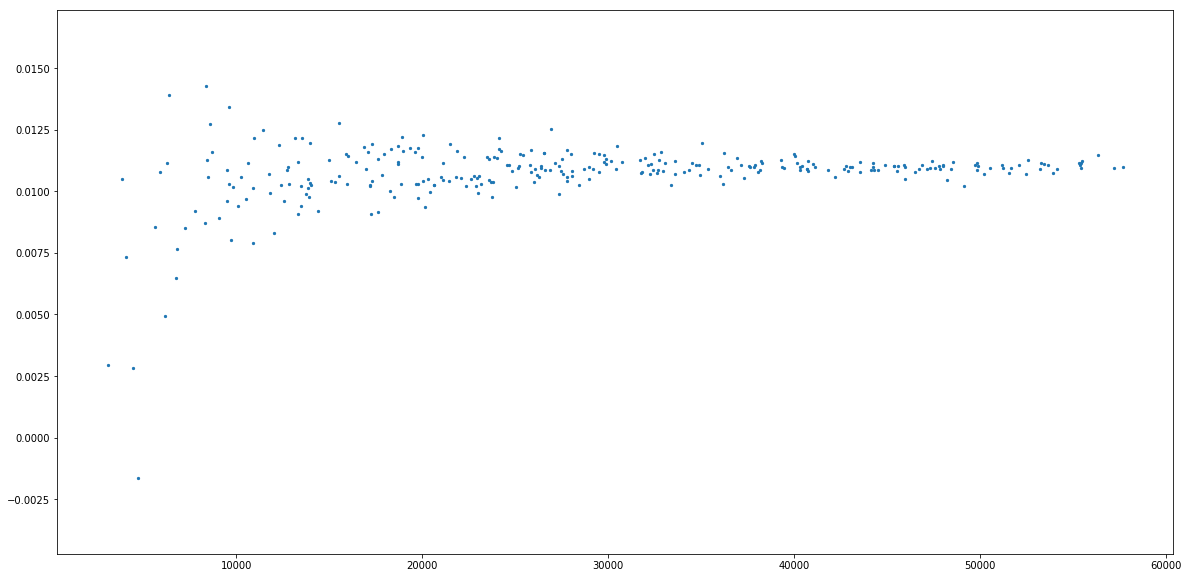

In [91]:
x = levels[level].pop.DM[0][1:]
y = eps[0][1:] # make sure we exclude the eps_ii point - no flow to itself
xy = np.array([x,y]).T
plt.figure(figsize=(20,10))
plt.scatter(x, y, s=5)
plt.show()

Try again with another location.

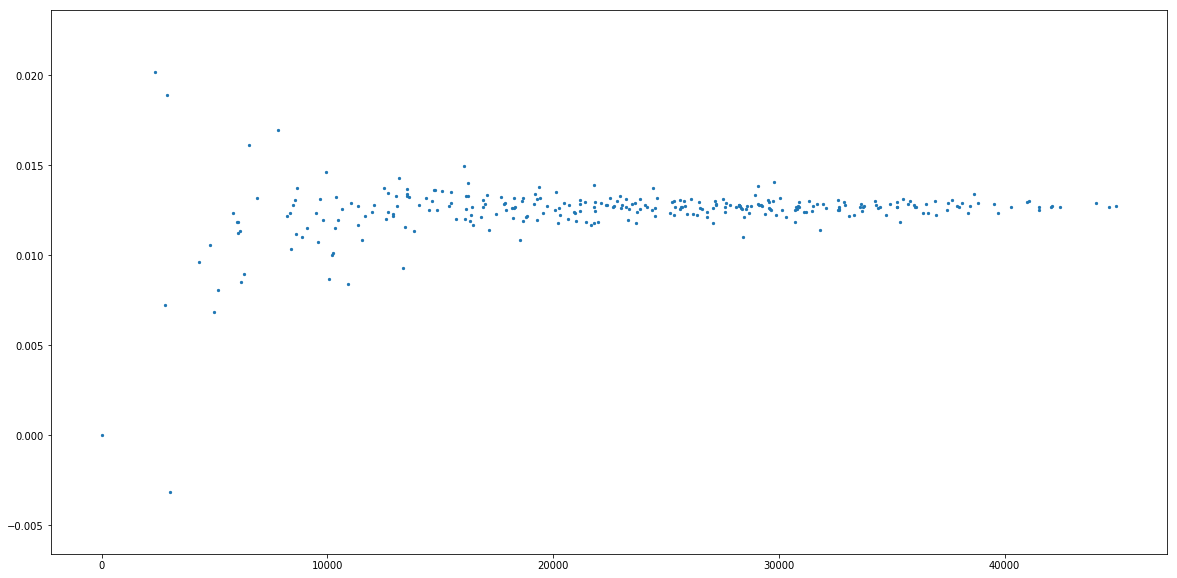

In [90]:
x = levels[level].pop.DM[50][1:]
y = eps[50][1:] # make sure we exclude the eps_ii point - no flow to itself
xy = np.array([x,y]).T
plt.figure(figsize=(20,10))
plt.scatter(x, y, s=5)
plt.show()

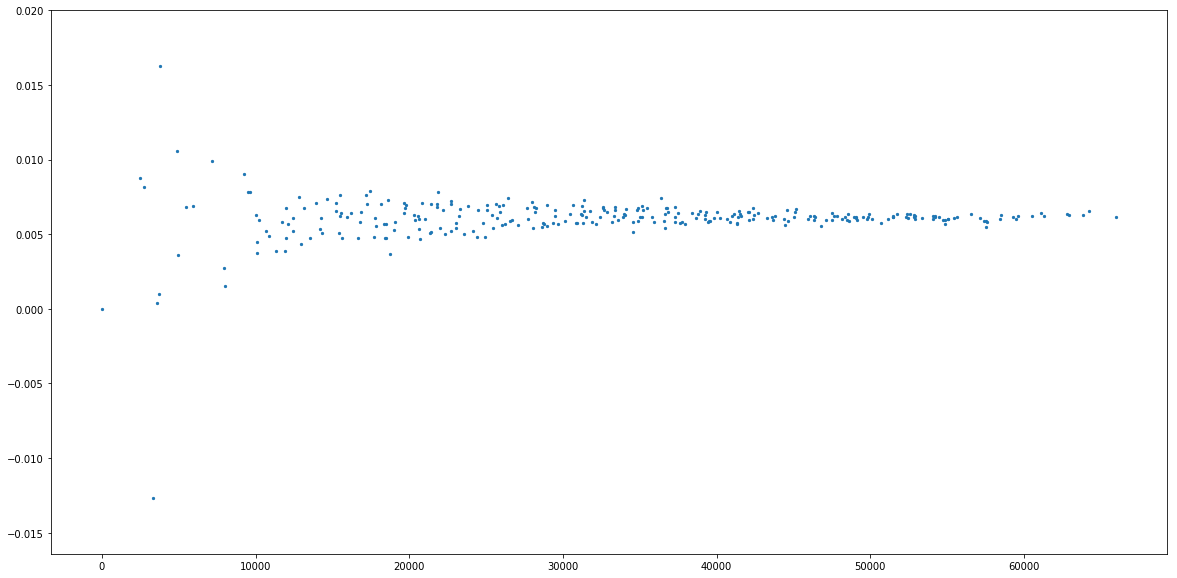

In [89]:
x = levels[level].pop.DM[100][1:]
y = eps[100][1:] # make sure we exclude the eps_ii point - no flow to itself
xy = np.array([x,y]).T
plt.figure(figsize=(20,10))
plt.scatter(x, y, s=5)
plt.show()

Now out of interest try for the backflow:

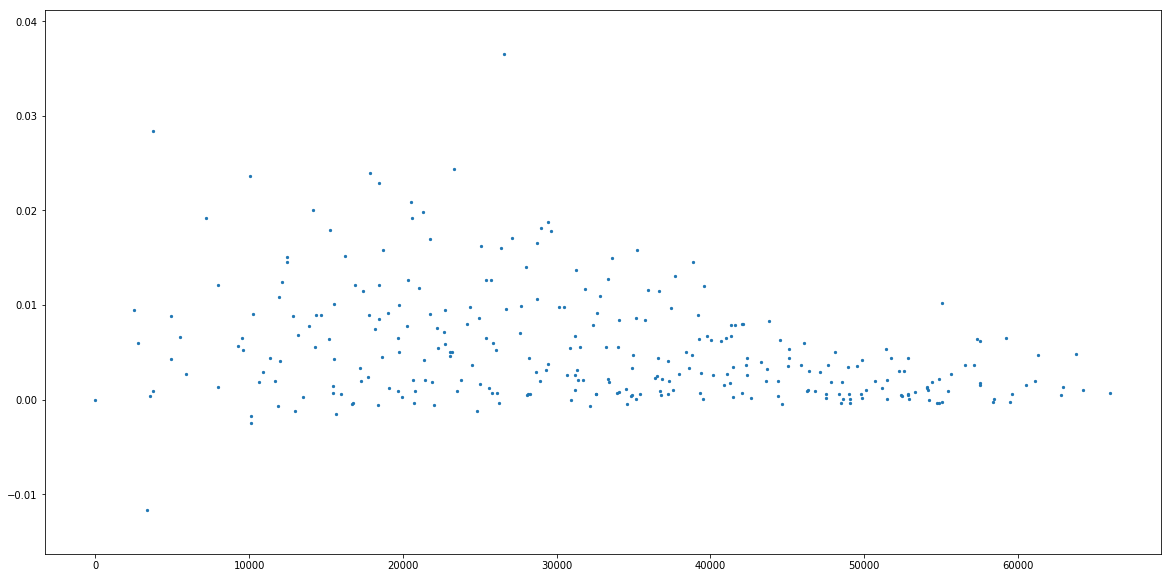

In [93]:
x = levels[level].pop.DM[:,100][1:]
y = eps[:,100][1:] # make sure we exclude the eps_ii point - no flow to itself
xy = np.array([x,y]).T
plt.figure(figsize=(20,10))
plt.scatter(x, y, s=5)
plt.show()

## Problems with $\gamma$ exponent in the gravity model

We need a realistic value for $\gamma$ to use to calculate the ODMs. The problem is, this scales with area of the population unit (in our case the LSOA). This is a problem once we start to rescale since there is now another variable introduced.

An approximation is perhaps to find the average distance between locations at each level and use this as the diameter of a circle with an area equal to the area we'll use. I need to find the paper which discusses this.

Actually, probably better is the area of the Voronoi tesselation sections centred on each location. Better _still_, find the area data for the LSOAs and combine them at each level of clustering. Since we're interested in only the _mean_ population unit area then we might be able to get away with just calculating mean area at the original resolution and just multiply it by the average number of locations in each cluster for each level.

Details on how to estimate $\beta$ page 10 [here](https://arxiv.org/pdf/1506.04889.pdf). They suggest for exponential decay gravity model:

$$\beta = 0.3 \cdot <S>^{-0.18},$$

and for power law:

$$\beta = 1.4 \cdot <S>^{0.11},$$

where $<S>$ is the average area of the unit location. The original source is [here](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0045985).

This could be quite useful, but it's not ideal, we'd have to be careful to distinguish changes in $\epsilon$ due to changes in the exponent and inherent scale-dependence - we're really searching for the latter.

In [16]:
df.columns

Index(['CODE', 'Name', 'TotPop2011', 'HouPop2011', 'HHCnt2011', 'Easting',
       'Northing'],
      dtype='object')

Unfortunately there's no data on LSOA areas in this dataset.